#타이타닉 분석

가장 유명한 난파사건인 타이타닉호 침몰, 1912년 빙산과 출동한 후 침몰한 사건입니다. 불행하게도 구명보트는 충분하지 않았고 그 결과 2224명 승객과 승무원들이 사망하였습니다.

 생존에는 운도 있겠지만 특정 그룹의 사람들이 많이 살아 남았다. 

 나이, 성별, 사회적 지위 등의 변수를 통해 어떤 종류의 그룹의 사람이 더 높은 생존율을 가지게 되었는가 분석해보고 예측하는 모델까지 구축해보자.

 예) 19세 남성 가족과 승선한 사람이 생존할 확률? 18세 여성이 친척과 승선한 사람이 생존할 확률?

In [2]:
import numpy as np #계산 관련 라이브러리
import pandas as pd # 데이터 분석 관련 라이브러리
import matplotlib.pyplot as plt #그림 그리기 라이브러리
import seaborn as sns #이쁜 그림 그리기 라이브러리

# %matplotlib inline



In [3]:
raw = pd.read_excel('titanic.xls')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
raw.describe()
# pclass - 선실등급
# survived - 생존 여부
# name - 이름과 사회계층
# sex - 성별
# age - 나이
# sibsp - 친척과 함께 탑승 인원수
# parch - 부모자식과 탑승 인원수
# flare - 지불 요금
# boat - 탑승한 구명 보트 번호

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
raw.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

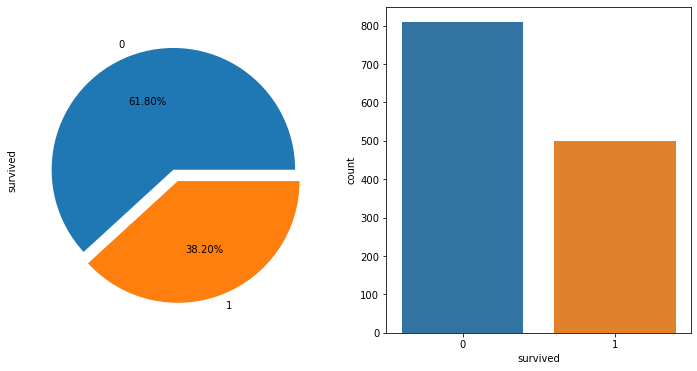

In [8]:
f , ax =plt.subplots(1,2,figsize=(12,6)) #액자와 캔버스 1행 2열, figsize = 전체 크기..

raw['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.2f%%', explode =[0,0.1])

sns.countplot('survived',data =raw, ax =ax[1])

<AxesSubplot:>

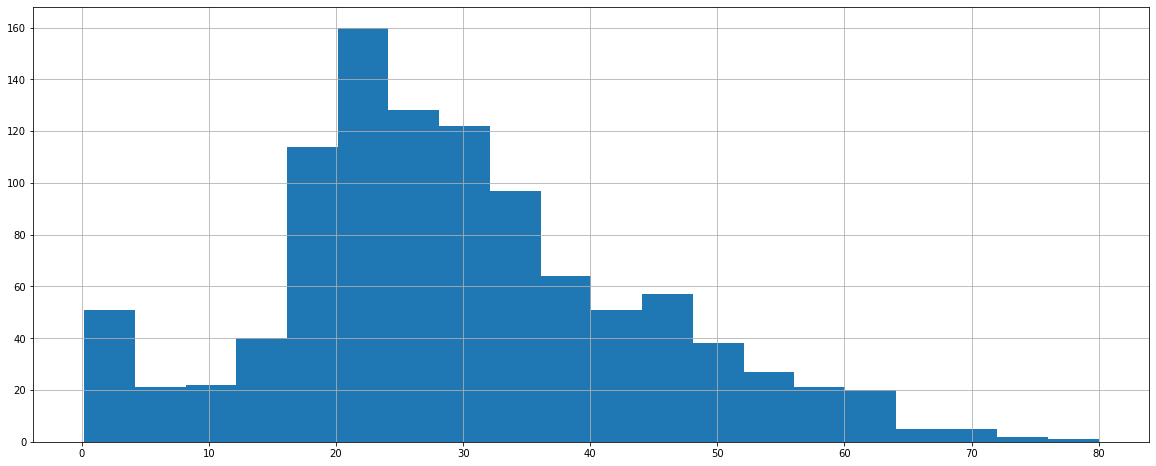

In [7]:
raw['age'].hist(bins=20,figsize=(20,8))

In [10]:
raw.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [8]:
raw.corr()  #상관관계

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


<AxesSubplot:>

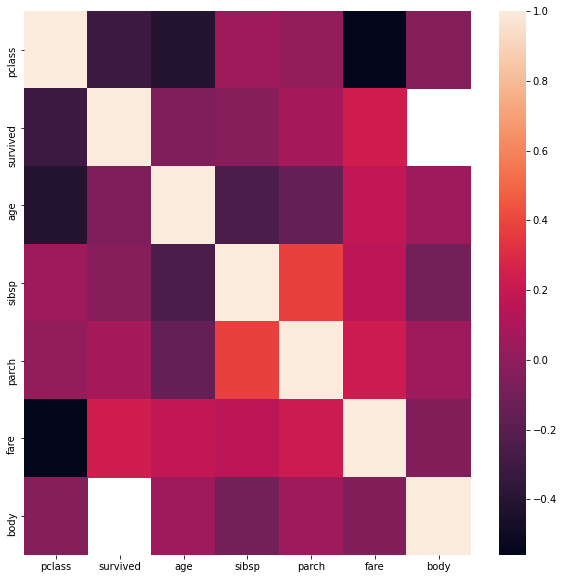

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(raw.corr())

<function matplotlib.pyplot.show(close=None, block=None)>

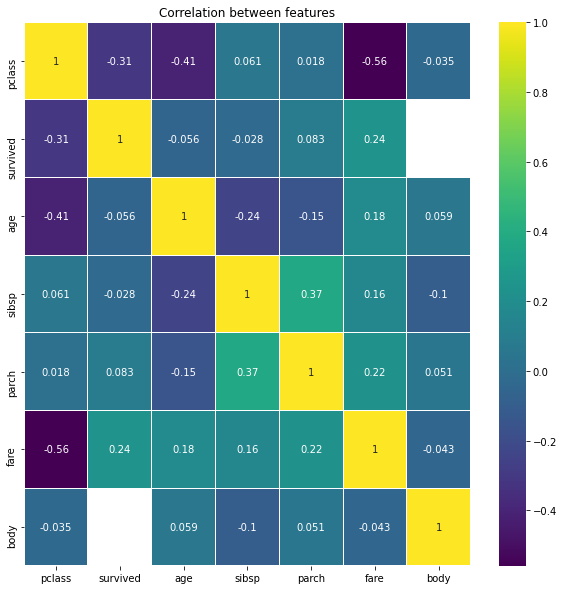

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(raw.corr(),linewidths=0.01,annot=True,cmap=plt.cm.viridis,linecolor='white')
plt.title('Correlation between features')
plt.show

In [12]:
raw['age_cat']=pd.cut(raw['age'],bins=[0,3,7,15,30,60,100], labels=['baby','children','teenage','young','adult','old'])

In [15]:
raw.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [13]:
raw.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_cat', ylabel='survived'>

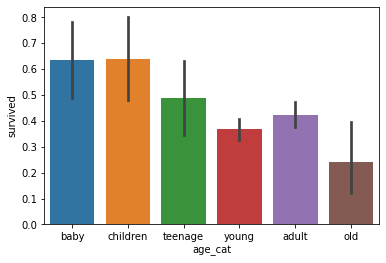

In [17]:
sns.barplot('age_cat','survived',data=raw)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='survived'>

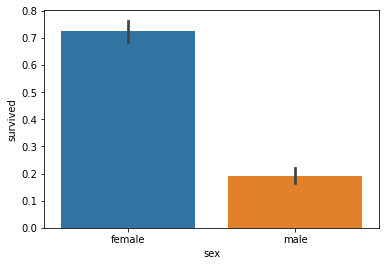

In [18]:
sns.barplot('sex','survived',data=raw)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='survived'>

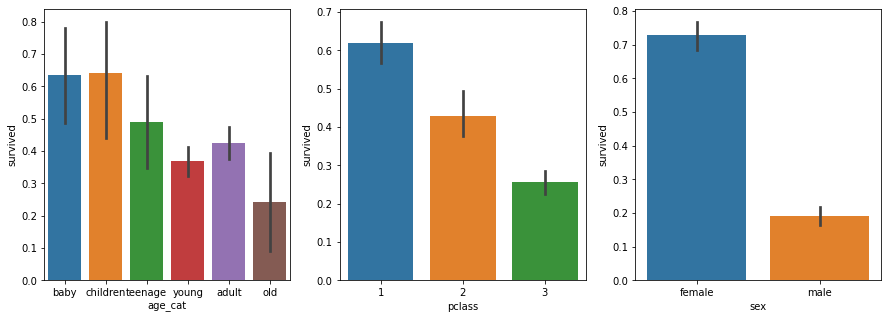

In [19]:
plt.figure(figsize=[15,5])
plt.subplot(131)    # 1행 3열 중 1번째
sns.barplot('age_cat','survived',data=raw)
plt.subplot(132)    # 1행 3열 중 2번째
sns.barplot('pclass','survived',data=raw)
plt.subplot(133)    # 1행 3열 중 3번째
sns.barplot('sex','survived',data=raw)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

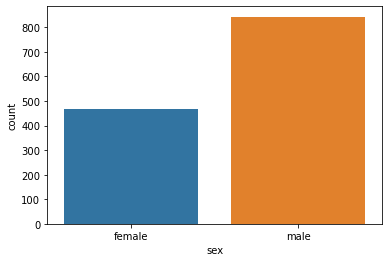

In [20]:
sns.countplot('sex',data=raw)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

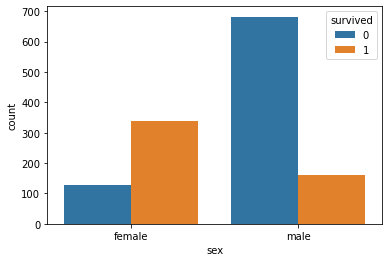

In [15]:
sns.countplot('sex',hue='survived',data=raw)

In [14]:
boat_sur = raw[raw['boat'].notnull()]
boat_sur.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


In [23]:
boat_sur['survived'].value_counts()

1    477
0      9
Name: survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

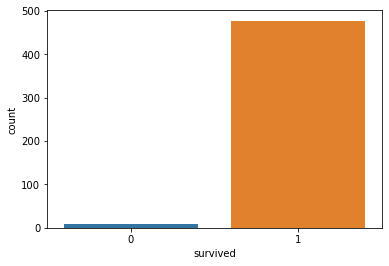

In [16]:
sns.countplot('survived',data=boat_sur)

In [25]:
raw['name'][0]

'Allen, Miss. Elisabeth Walton'

In [26]:
raw['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [27]:
raw['name'][0].split(',')[1].split('.')[0]

' Miss'

In [28]:
raw['name'][1].split(',')[1].split('.')[0].strip()

'Master'

In [17]:

con_rare= lambda x: x.split(',')[1].split('.')[0].strip()
raw['title']=raw['name'].map(con_rare)

raw.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [18]:
titles=raw['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [19]:
pd.crosstab(raw['title'],raw['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [23]:
raw['title']=raw['title'].replace('Mlle','Miss')
raw['title']=raw['title'].replace('Ms','Miss')
raw['title']=raw['title'].replace('Mme','Miss')

Rare=['Lady','the Countess','Capt','Master','Col','Don','Dona','Dr','Jonkheer','Major','Dona','Rev','Sir']

for each in Rare:
    raw['title']= raw['title'].replace(each,'Rare')
    

In [24]:
raw['title'].unique()


array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [25]:
raw[['title','survived']].groupby(['title']).mean()

,survived
title,
Miss,0.679245
Mr,0.162483
Mrs,0.786802
Rare,0.466667


In [35]:
raw.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [36]:
tmp =[]

for each in raw['sex']:
    if each =='female':
        tmp.append(0)
    elif each =='male':
        tmp.append(1)
    else:
        tmp.append(np.nan)


In [37]:
raw['sex']=tmp
raw.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [38]:
raw['survived']=raw['survived'].astype('float')
raw['pclass']=raw['pclass'].astype('float')
raw['sex']=raw['sex'].astype('float')
raw['sibsp']=raw['sibsp'].astype('float')
raw['parch']=raw['parch'].astype('float')
raw['fare']=raw['fare'].astype('float')
raw.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [39]:
raw = raw[raw['age'].notnull()]
raw = raw[raw['sibsp'].notnull()]
raw = raw[raw['parch'].notnull()]
raw = raw[raw['fare'].notnull()]


In [40]:
train_pre=raw[['pclass','sex','age','sibsp','parch','fare']]

In [41]:
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [42]:
from sklearn.model_selection import train_test_split    #데이터를 훈련용과 검증용으로 나누어 준다. 100 -> 75 25 

X_train,X_test,y_train,y_test= train_test_split(train_pre, raw[['survived']])

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 443 to 1207
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  783 non-null    float64
 1   sex     783 non-null    float64
 2   age     783 non-null    float64
 3   sibsp   783 non-null    float64
 4   parch   783 non-null    float64
 5   fare    783 non-null    float64
dtypes: float64(6)
memory usage: 42.8 KB


In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 276 to 922
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  328 non-null    int64  
 1   sex     328 non-null    object 
 2   age     259 non-null    float64
 3   sibsp   328 non-null    int64  
 4   parch   328 non-null    int64  
 5   fare    328 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 17.9+ KB


In [44]:
X_test.head()


,pclass,sex,age,sibsp,parch,fare
316,1.0,1.0,51.0,0.0,1.0,61.3792
1017,3.0,1.0,21.0,0.0,0.0,7.7750
347,2.0,1.0,42.0,0.0,0.0,13.0000
889,3.0,1.0,26.0,0.0,0.0,7.7750
830,3.0,1.0,14.0,5.0,2.0,46.9000


In [45]:
from sklearn.tree import DecisionTreeClassifier #의사 결정 나무 모델링

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)


print(tree_clf.score(X_train,y_train))

0.8058748403575989


In [46]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='titanic.dot',
    feature_names=['pclass','sex','age','sibsp','parch','fare'],
    class_names=['Unsurvived','Survived'],
    rounded=True,
    filled=True
)

In [47]:
import graphviz

with open('titanic.dot') as f:
    dot_graph=f.read()
    dot=graphviz.Source(dot_graph)
    dot.format='png'
    dot.render(filename='titanic_tree',cleanup=True)
    dot

In [49]:
from sklearn.metrics import accuracy_score

y_pred=tree_clf.predict(X_test)
accuracy_score(y_test,y_pred)*100



84.35114503816794

In [50]:
dica=[3.,1.,19.,0.,0.,5.,]
win = [1.,0.,16.,2.,2.,100]


In [51]:
tree_clf.predict_proba([dica])


array([[0.86571429, 0.13428571]])

In [52]:
%pwd

'd:\\easydong02\\vsCode\\study'

In [53]:
an_apple=27
an_example=42

any

<function any(iterable, /)>

In [54]:
b=[1,2,3]


In [55]:
import datetime



In [56]:
datetime.datetime

datetime.datetime